In [21]:
# Imports
import pandas
import json
import matplotlib.pyplot as plt
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import numpy as np

# Prepare data

In [15]:
def GetReleaseDate(orig):
    if pandas.isna(orig):
        return 1900
    yr = int(orig.split('/')[2])
    if yr <= 19:
        return 2000 + yr
    else:
        return 1900 + yr

def GetReleaseMonth(orig):
    if pandas.isna(orig):
        return 0
    return int(orig.split('/')[1])

import ast
def get_dictionary(s):
    try:
        d = ast.literal_eval(s)
    except ValueError as err:
        if not pandas.isna(s):
            print("get_dictionary error: {}".format(err))
        d = {}    
    return d

def GetCountryCodes(raw):
    return [x.get('iso_3166_1', 'NA').lower() for x in get_dictionary(raw)]

def GetGenres(raw):
    return [x.get('name', 'NA').lower() for x in get_dictionary(raw)]

def GetProductionCompanies(raw):
    return [x.get('name', 'NA').lower().replace(' ', '_')
            for x in get_dictionary(raw)]

class TransformerState:
    def __init__(self):
        pass
    
def TransformAndFix(train, test):
    t_production_countries = train['production_countries'].apply(GetCountryCodes)
    t_genres = train['genres'].apply(GetGenres)    
    t_production_companies = train['production_companies'].apply(GetProductionCompanies)
    ret = TransformerState()
    ret.genres = pandas.Series(t_genres.sum()).value_counts()
    ret.countries = pandas.Series(t_production_countries.sum()).value_counts()
    ret.production_companies = pandas.Series(t_production_companies.sum()).value_counts()
    
    ret.genres = ret.genres[ret.genres > 50]
    ret.countries = ret.countries[ret.countries > 10]
    ret.production_companies = ret.production_companies[ret.production_companies > 10]

    for data in [train, test]:
        data['t_release_yr'] = data['release_date'].apply(GetReleaseDate)
        data['t_release_mo'] = data['release_date'].apply(GetReleaseMonth)
        for g in ret.production_companies.keys():
            data['t_production_company_{}'.format(g)] = \
                data['production_companies'].apply(lambda x: g in GetProductionCompanies(x))

        for g in ret.genres.keys():
            data['t_genre_{}'.format(g)] = \
                data['genres'].apply(lambda x: g in GetGenres(x))
        for g in ret.countries.keys():
            data['t_production_country_{}'.format(g)] = \
                data['production_countries'].apply(lambda x: g in GetCountryCodes(x))
    return ret

In [5]:
train_orig = pandas.read_csv('train.csv')
test_orig = pandas.read_csv('test.csv')

train = train_orig.copy()
test = test_orig.copy()

In [16]:
transform_state = TransformAndFix(train, test)

In [17]:
to_remove = {'id', 'belongs_to_collection', 'genres', 'homepage',
             'imdb_id', 'original_language', 'original_title', 'overview',
             'production_companies', 'production_countries', 'release_date', 
             'runtime', 'spoken_languages', 'status', 'tagline', 'title', 
             'Keywords', 'cast', 'crew', 'poster_path', 'revenue'}
useful_columns = [c for c in train.columns if c not in to_remove ]

In [18]:
train[useful_columns].head()

,budget,popularity,t_release_yr,t_release_mo,t_genre_drama,t_genre_comedy,t_genre_thriller,t_genre_action,t_genre_romance,t_genre_crime,...,t_production_company_gaumont,t_production_company_ingenious_film_partners,t_production_company_scott_free_productions,t_production_company_revolution_studios,t_production_company_canal+_españa,t_production_company_uk_film_council,t_production_company_wild_bunch,t_production_company_davis_entertainment,t_production_company_tf1_films_production,t_production_company_ciné+
0,14000000,6.575393,2015,20,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,40000000,8.248895,2004,6,True,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,3300000,64.299990,2014,10,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200000,3.174936,2012,9,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,1.148070,2009,5,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
test[useful_columns].head()

,budget,popularity,t_release_yr,t_release_mo,t_genre_drama,t_genre_comedy,t_genre_thriller,t_genre_action,t_genre_romance,t_genre_crime,...,t_production_company_gaumont,t_production_company_ingenious_film_partners,t_production_company_scott_free_productions,t_production_company_revolution_studios,t_production_company_canal+_españa,t_production_company_uk_film_council,t_production_company_wild_bunch,t_production_company_davis_entertainment,t_production_company_tf1_films_production,t_production_company_ciné+
0,0,3.851534,2007,14,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,88000,3.559789,1958,19,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,8.085194,1997,23,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,6800000,8.596012,2010,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2000000,3.217680,2005,11,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


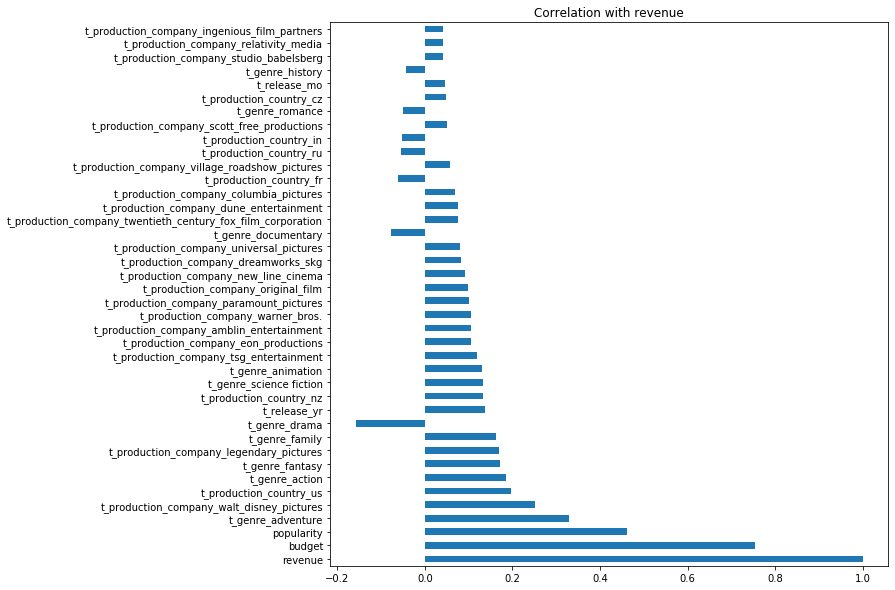

In [40]:
plt.subplots(figsize=(10, 8))
corr = train[useful_columns + ["revenue"]].corr()
corr["order"] = -np.abs(corr["revenue"])
corr[["revenue", "order"]].dropna().sort_values(by="order").head(40)["revenue"].plot(
        kind="barh",
        title = "Correlation with revenue",
        figsize = (10,10))

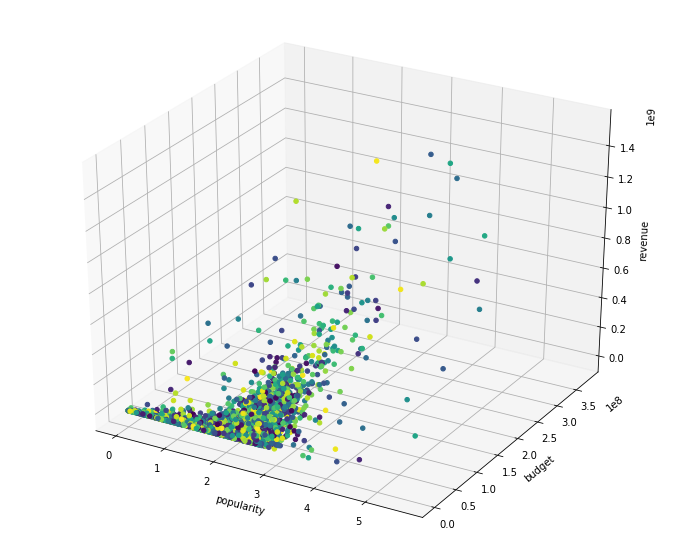

In [147]:
fig, ax = plt.subplots(1,2,figsize=(12,10))
plt.subplot(1,2,1)
ax = plt.subplot(projection='3d')
colors = np.random.rand(len(train))

xs = np.array(np.log1p(train['popularity']))
ys = np.array(train['budget'])
zs = np.array(train['revenue'])
ax.scatter(xs,ys, zs, c= colors,marker='o', alpha=1)
#plt.plot([0,17500],[0,400000000],[0,400000000],c="green")

ax.set_xlabel('popularity')
ax.set_ylabel('budget')
ax.set_zlabel('revenue')

plt.show()

Text(0.5, 1.0, 'Link between revenue and budget')

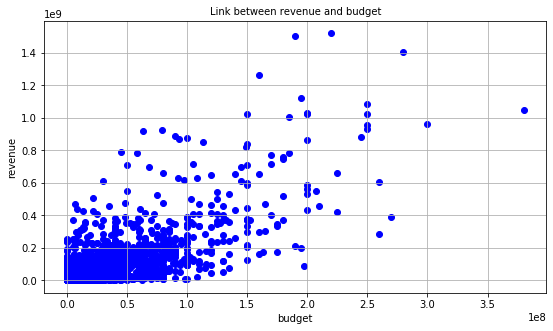

In [148]:
x1 = np.array(train["budget"])
y1 = np.array(train["revenue"])

fig = plt.figure(1, figsize=(9, 5))


plt.scatter(x1, y1, c=['blue'],marker='o')
plt.grid()
plt.xlabel("budget", fontsize=10)  
plt.ylabel("revenue", fontsize=10)
plt.title("Link between revenue and budget", fontsize=10)

Text(0.5, 1.0, 'Link between revenue and popularity')

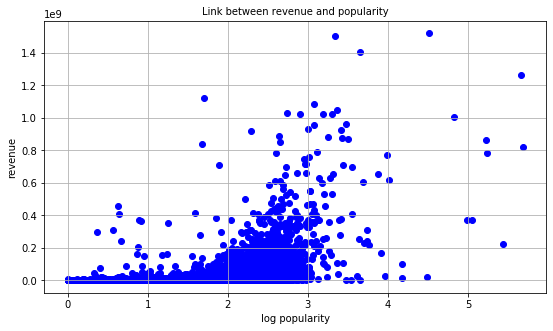

In [151]:
x1 = np.array(np.log1p(train["popularity"]))
y1 = np.array(train["revenue"])

fig = plt.figure(1, figsize=(9, 5))


plt.scatter(x1, y1, c=['blue'],marker='o')
plt.grid()
plt.xlabel("log popularity", fontsize=10)  
plt.ylabel("revenue", fontsize=10)
plt.title("Link between revenue and popularity", fontsize=10)